* In this notebook, we will make and learn various basic different types of models using keras

# Basic Image Classification

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
tf.__version__

'2.11.0'

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist # fashion_mnist is already inside the tensorflow library show we can directly call this dataset.

((train_imgs, train_labels),(test_imgs, test_labels)) = fashion_mnist.load_data() # making training and test data

4422102/4422102 [==============================] - 0s 0us/step


* Here, labels are :

In [3]:
# Our Labels actually are:-
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Here index in the list is same as in labels

* Preprocessing and Understanding the data:

In [4]:
plt.figure() # It is a function to create a new figure

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

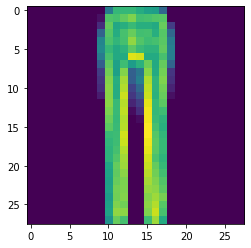

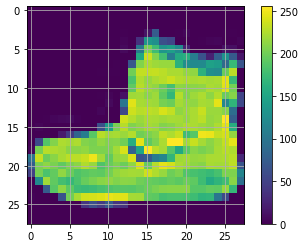

In [5]:
plt.imshow(train_imgs[69]) # showing 70th photo
plt.figure() # creating another new figure
plt.imshow(train_imgs[0]) # and showing this 1st photo
plt.colorbar() # making colorbar for 1st photo
plt.grid(True) # making grids for 1st photo
plt.show() 
# plt. show() starts an event loop, looks for all currently active figure objects, 
# and opens one or more interactive windows that display your figure or figures


- Now we scale the values of inputs (pixels) between 0 and 1. (NOTE: Here max pixel possible is 255)
- This is also known as `normalizing the data`
- we generally do this normalization basically for two reasons:
  * First, for example, say `linear regression`, by normalizing, the `weights` gets adjusted more appropriately in next epochs more fastly.
  * and, Second, while calculating `gradient descent`, by normalizing, it decreases the, what you can say the zig-zag motion during adjusting `weights` accordingly to decrease the `loss function`, and more steeply comes to the minimum point,

In [6]:
# So, normalizing the data:
train_imgs = train_imgs / 255.0

test_imgs = test_imgs / 255.0

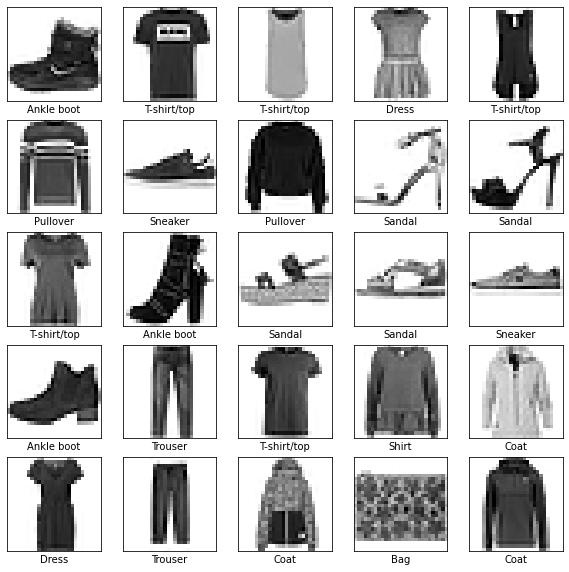

In [7]:
# displaying first 25 images from training set.
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1) # subplot(nrows, ncols, index, **kwargs)
  plt.xticks([]) # Passing an empty list removes all xticks from image.
  plt.yticks([]) # Passing an empty list removes all yticks from image.
  plt.grid(False) # Not displaying grids
  plt.imshow(train_imgs[i], cmap=plt.cm.binary) # cmap=plt.cm.binary makes images binary - `black and white`
  plt.xlabel(class_names[train_labels[i]])
plt.show()


### Building the Model

- 1) Configuring layers of the model. (Building the structure of `Neural Network` of our model)

In [8]:
# Making our model

# Creation of model (input layer, hidden layer and output (Logits array)); layers are not connected
# That is, weights are not still initialized.
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # 28 * 28
    tf.keras.layers.Dense(128, activation='relu'), # defining `relu (rectified linear unit) = max(0, a)` activation for Hidden layer's neuron.
    tf.keras.layers.Dense(10) # output layer (Logits array)
    # Dense - Densely connected means fully connected all neurons of all layers.
])

model.layers

- 2) After structuring our model, We will `compile` our model (giving `functionality` to our model, `Providing way of learning`)
  * Providing `Loss function`: This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
  * Providing `optimizer`: tells how the model (weights) is updated based on data it sees and loss function.
  * Providing `Metrics`: Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [9]:
# Compiling our model

model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


- 3) `Feed the model`, We feed the model using our training images and training labels.

In [10]:
# fitting our model with training data

model.fit(train_imgs, train_labels, epochs=10)
# Using 10 epochs, That is, 10 times our weights of neuron adjust themselves to decrease the loss and make accurate predictions.

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4982 - accuracy: 0.8231
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3733 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3348 - accuracy: 0.8782
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3128 - accuracy: 0.8854
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2923 - accuracy: 0.8942
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2790 - accuracy: 0.8977
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2661 - accuracy: 0.9015
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2549 - accuracy: 0.9045
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2445 - accuracy: 0.9084
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.237

In [11]:
test_loss, test_acc = model.evaluate(test_imgs,  test_labels, verbose=2)
# By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.
# verbose=0 will show you nothing (silent)
# verbose=1 will show you an animated progress
# verbose=2 will show you just epoch.
print('\nTest accuracy:', test_acc) # printing accuracy

313/313 - 1s - loss: 0.3342 - accuracy: 0.8845 - 643ms/epoch - 2ms/step

Test accuracy: 0.8845000267028809


- sometimes when we provide new test data, new test data predictions's accuracy are somewhat lesser than that of trained model.
- this is due to, something called as `overfitting`.

#### Making `Predictions`

- With the model trained, you can use it to make predictions about some images. Attach a softmax layer to convert the model's linear outputs—logits—to probabilities, which should be easier to interpret.

In [12]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [13]:
predictions = probability_model.predict(test_imgs) # again predicting after adding softmax layer

313/313 [==============================] - 1s 2ms/step


In [14]:
predictions[0] # prediction of test data: test_imgs[0]

array([2.7618175e-06, 7.1132789e-10, 2.3141843e-07, 2.1269231e-10,
       2.2710282e-07, 3.6224175e-02, 1.7906290e-06, 6.0303900e-02,
       3.7559673e-08, 9.0346688e-01], dtype=float32)

* A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [15]:
np.argmax(predictions[0]) # `argmax` shows which has highest probability in predictions[0]

9

In [16]:
test_labels[0]

9

* So our prediction is correct

In [17]:

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

#### Verify predictions

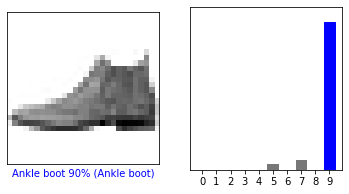

In [18]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_imgs)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

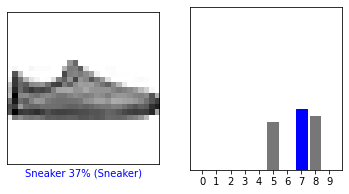

In [19]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_imgs)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

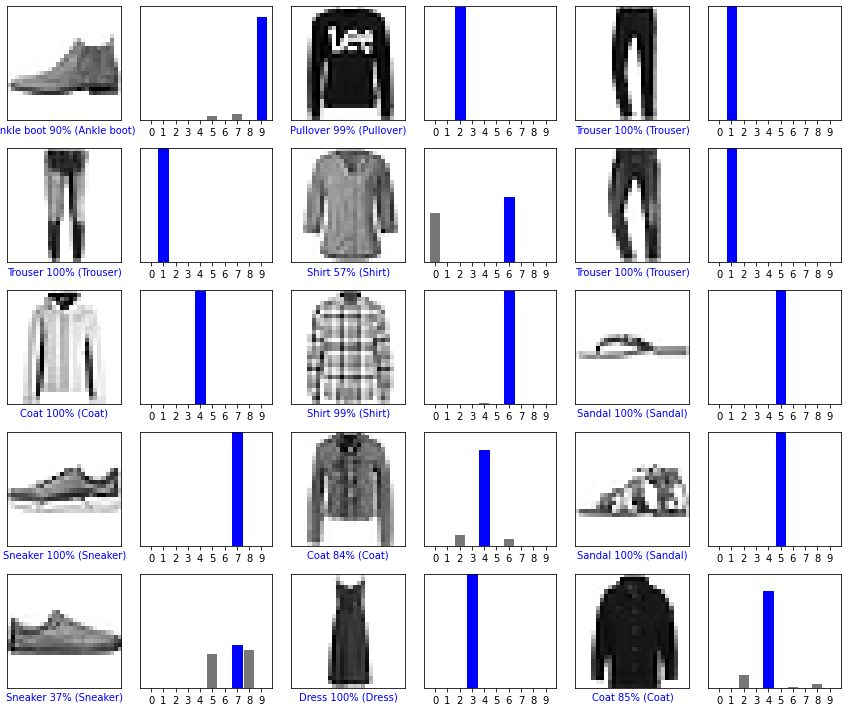

In [20]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_imgs)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

#### Use the trained model

In [21]:
# Grab an image from the test dataset.
img = test_imgs[1]

print(img.shape)

(28, 28)


- `tf.keras` models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [22]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [23]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 30ms/step
[[2.0795645e-05 1.4624388e-13 9.9401408e-01 8.7352375e-10 5.2293012e-04
  8.1196256e-12 5.4422016e-03 5.2344503e-16 1.6855597e-10 2.1949621e-13]]


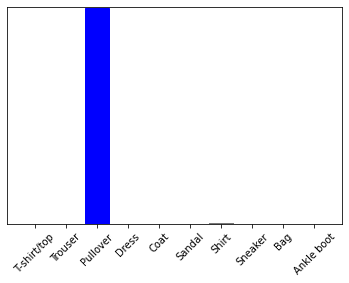

In [24]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [25]:
np.argmax(predictions_single[0])

2

* So Our Model predicted as expected